# Solving Sudoku (a tiny version of Sudoku) using Grover's algorithm

In [1]:
import qckt
from qckt.backend import *
from qckt import QCktException
import libgrover as grv

## Qubits assignment


|    8 | 7 6 5 4 | 3 2 1 0 |
|--- |---|---|
|  out |   work  |   input |


In [2]:
inpreg = [3,2,1,0]
wrkreg = [7,6,5,4]
outreg = [8]
allqreg = outreg + wrkreg + inpreg
nqbits = len(allqreg)

## The oracle circuit

In [3]:
### Sudoku validation circuit
sudo = qckt.QCkt(nqbits,name="Sudoku Validator")
rules = [[0,1],[1,3],[3,2],[2,0]] # rule is that the qubits in a tuple cannot be equal
for w,r in enumerate(rules):
	sudo.CX(inpreg[r[0]],wrkreg[w])
	sudo.CX(inpreg[r[1]],wrkreg[w])
sudo.CX(*wrkreg,outreg[0])
for w,r in enumerate(rules):
	sudo.CX(inpreg[r[0]],wrkreg[w])
	sudo.CX(inpreg[r[1]],wrkreg[w])
# sudo.draw()

### create a single gate representation of the sudoku circuit, and replace the Uf circuit using that one gate
sudo_op = sudo.to_opMatrix()
qckt.define_gate("Sudo",sudo_op)
sudockt = qckt.QCkt(nqbits,nqbits,name="Sudoku Validator")
sudockt.Sudo(*allqreg)
# sudo.draw()

<qckt.Gates.define_gate.<locals>.USER_DEFINED_GATE at 0x7f154730f7f0>

## Use libgrover.py to create the full circuit

In [4]:
grv_ckt = grv.Grover(sudockt,inpreg,outreg,nmarked=2).getckt()
grv_ckt.M(inpreg)
grv_ckt.draw()

Full Grover's Circuit
q000 -[H]---------[Sudo L]-[H]-[X]-[.]-[X]-[H]-[Sudo L]-[H]-[X]-[.]-[X]-[H]-[M]-
                  |      |          |          |      |          |           |  
q001 -[H]---------[Sudo  ]-[H]-[X]-[.]-[X]-[H]-[Sudo  ]-[H]-[X]-[.]-[X]-[H]-[M]-
                  |      |          |          |      |          |           |  
q002 -[H]---------[Sudo  ]-[H]-[X]-[.]-[X]-[H]-[Sudo  ]-[H]-[X]-[.]-[X]-[H]-[M]-
                  |      |          |          |      |          |           |  
q003 -[H]---------[Sudo  ]-[H]-[X]-[.]-[X]-[H]-[Sudo  ]-[H]-[X]-[.]-[X]-[H]-[M]-
                  |      |          |          |      |          |           |  
q004 -------------[Sudo  ]----------|----------[Sudo  ]----------|-----------|--
                  |      |          |          |      |          |           |  
q005 -------------[Sudo  ]----------|----------[Sudo  ]----------|-----------|--
                  |      |          |          |      |          |           |  
q006 -

## Run the circuit several times and readout the stats

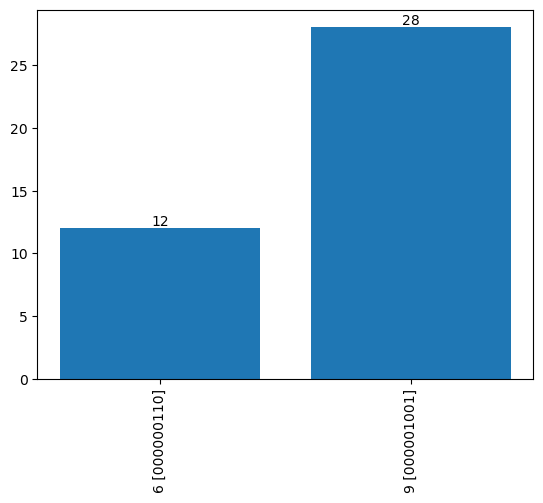

In [5]:
job = qckt.Job(grv_ckt,shots=40)
q = Qeng()
q.runjob(job)
_ = job.plot_counts()